## Analyze trained models

In this notebook I want to perform the analysis of the 5-fold cross validation performed on O'Neil dataset.

Firstly, I will load the files, that were created at the process of training. They contain MSE (Mean Squared Error) loss on both training and test sets and Pearson correlation coefficients between true and predicted scores on both training and test sets.

In [1]:
import numpy as np

base_path = '/Users/olha/Study/Software Project ML for Cancer'
loss_train = [np.load(f'{base_path}/epoch_500_fold_{i}/loss.npy') for i in range(1, 6)]
loss_test = [np.load(f'{base_path}/epoch_500_fold_{i}/test_loss.npy') for i in range(1, 6)]

pearson_train = [np.load(f'{base_path}/epoch_500_fold_{i}/pearson.npy') for i in range(1, 6)]
pearson_test = [np.load(f'{base_path}/epoch_500_fold_{i}/test_pearson.npy') for i in range(1, 6)]

Then, I visualize the statistics from the files.

In [5]:
import matplotlib.pyplot as plt

def plot_all_folds(loss_list, pearson_list, plot_type="Test"):
    plt.figure(figsize=(12, 5))
    
    # Plot Loss
    plt.subplot(1, 2, 1)
    for i, loss in enumerate(loss_list):
        plt.plot(range(1, len(loss) + 1), loss, label=f'Fold {i+1}')
    
    plt.title(f'{plot_type} Loss per Epoch - All Folds')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    # Plot Pearson
    plt.subplot(1, 2, 2)
    for i, pearson in enumerate(pearson_list):
        plt.plot(range(1, len(pearson) + 1), pearson, label=f'Fold {i+1}')
    
    plt.title(f'{plot_type} Pearson Correlation per Epoch - All Folds')
    plt.xlabel('Epoch')
    plt.ylabel('Pearson Correlation')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

### O-Neil dataset

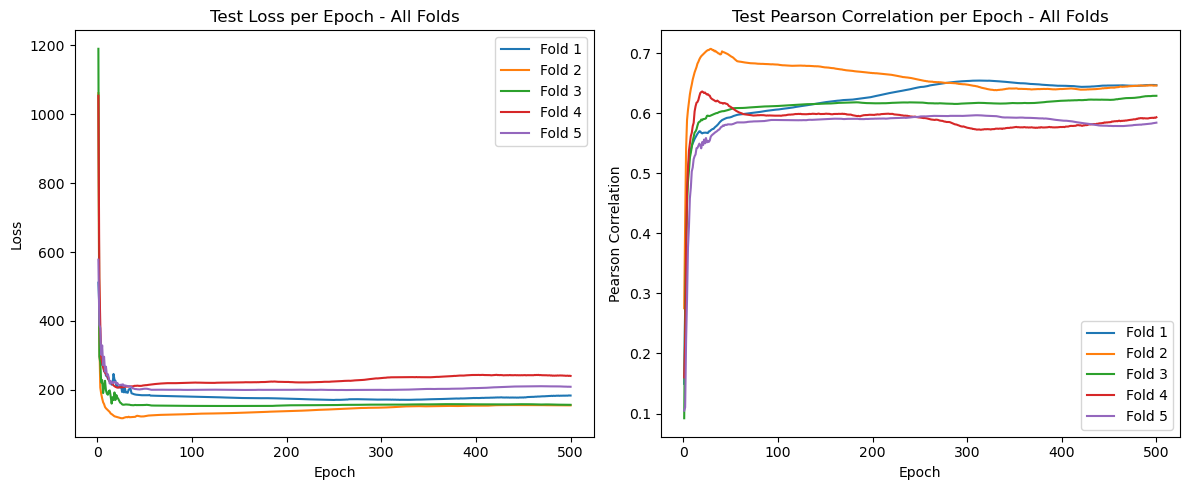

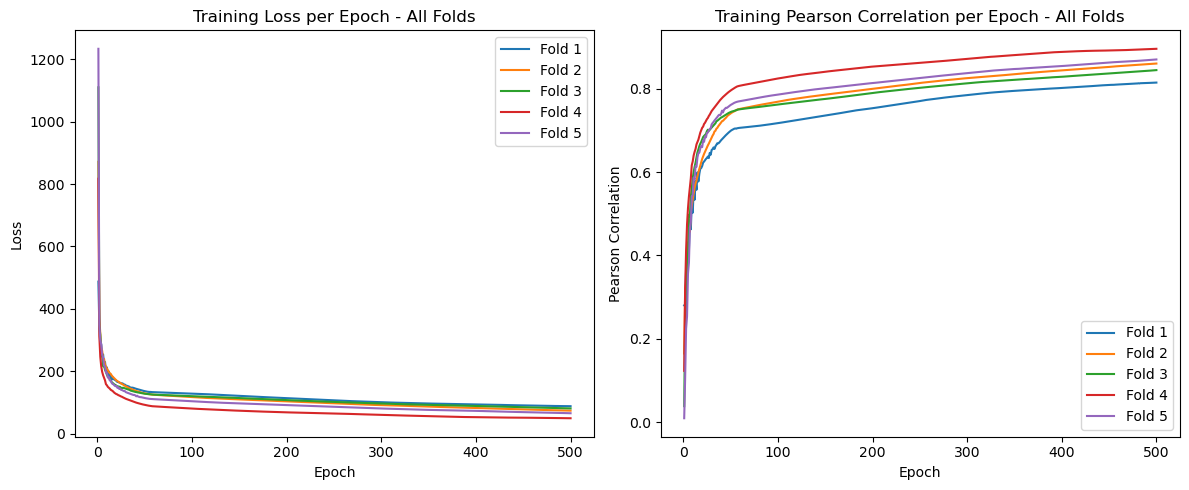

In [6]:
plot_all_folds(loss_test, pearson_test, plot_type="Test")

plot_all_folds(loss_train, pearson_train, plot_type="Training")

Looking at the training graphs, we can conclude the following:

Training Loss:

- All five folds show consistent convergence, starting with extremely high loss values (~1200) that decrease within the first 50 epochs.
- The loss steadily decreases throughout training, with all folds eventually reaching values between 50-100 by epoch 500.
- Fold 4 (red line) shows marginally better loss reduction compared to other folds.

Training Pearson Correlation:

- All folds demonstrate improvement in correlation during early epochs, reaching ~0.7 by epoch 50.
- Correlation continues to improve more gradually afterwards, with all folds exceeding 0.8 by training completion.
- Fold 4 achieves the highest final correlation (0.88), while Fold 1 shows slightly lower performance (0.82).
- The consistent improvement across all folds indicates stable learning.


And the test results can be described in the following way:

Test Loss:

- Similar to training, test loss decreases rapidly in early epochs, stabilizing after approximately epoch 50.
- Final test losses range between ~150-230, with Fold 4 showing the highest test loss (inspite of its performance on training data).
- The gap between training and test losses indicates some degree of overfitting.

Test Pearson Correlation:

- Test correlations plateau much earlier than training correlations, stabilizing around epoch 50.
- Final test correlations range between 0.58-0.65 across folds.
- Fold 2 initially shows the strongest performance but gradually decreases, while Fold 1 and 3 demonstrate slight improvements over extended training.

Overall, we can see pretty similar performance patterns across folds that suggest robust model behavior independent of data partitioning. The difference between training and test correlations indicates some overfitting, though test performance remains strong. Average test Pearson correlation of ~0.62 demonstrates good predictive capability for drug combination efficacy.